In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from pymoo.core.problem import Problem
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.optimize import minimize
from time import time as tm

In [3]:
df_learning_dataset = pd.read_csv("../Data/Learning_Dataset.csv")

In [4]:
y_data = np.array(df_learning_dataset.iloc[:,[6,7,8,10]])
x_data = np.array(df_learning_dataset.iloc[:,[0,1,2,3]])

In [15]:
wanted_feature_set = [1,0,1,0]

In [16]:
model = keras.models.load_model("../Models/NN")

In [17]:
# Define single-objective Optimization Problem

class MyProblem(Problem):

    def __init__(self):
        super().__init__(n_var=4,
                         n_obj=1,
                         xl=0.0,
                         xu=1.0)

    def _evaluate(self, x, out, *args, **kwargs):
        prediction = model.predict(x)
        
        function_values = np.zeros(prediction.shape[0])
        for i in range(prediction.shape[0]):
            function_values[i] = sum((abs(prediction[i]-wanted_feature_set)))
        #print(function_values)
        
        out["F"] = function_values
        #print(out)
        
problem = MyProblem()

In [18]:
# Choose Optimization Algorithm

algorithm = GA(
    pop_size=100,
    save_history=True,
    eliminate_duplicates=True)

In [19]:
# Optimize

start_time = tm()

res = minimize(problem,
               algorithm,
               seed=1,
               verbose=False)

runtime = round((tm()-start_time),2)
print("Total runtime: "+str(runtime)+" s")

print("Best solution found: \nX = %s\nF = %s" % (res.X, res.F))

4/4 [==============================] - 0s 2ms/step
Total runtime: 29.17 s
Best solution found: 
X = [0.29543267 0.44804774 0.18246063 1.        ]
F = [1.09764944]


In [20]:
print(res.X)

[0.29543267 0.44804774 0.18246063 1.        ]


In [21]:
x_retrans = res.X*(np.max(x_data, axis=0) - np.min(x_data, axis=0))+np.min(x_data, axis=0)
print(x_retrans)

[20.08942155 67.20716051 41.38612193 69.99999985]


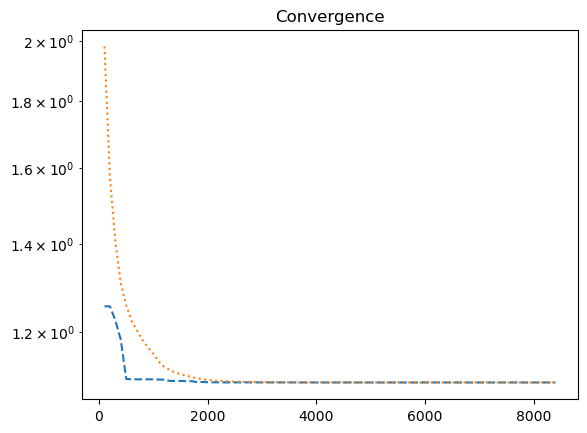

,0,1,2
0,100.0,1.254835,1.980967
1,200.0,1.254835,1.575678
2,300.0,1.224085,1.405484
3,400.0,1.183341,1.306934
4,500.0,1.104558,1.256964


In [22]:
n_evals = np.array([e.evaluator.n_eval for e in res.history])
opt = np.array([e.opt[0].F for e in res.history]).flatten()
opt_F = np.array([e.pop.get("F") for e in res.history])
opt_avg = ([np.mean(e) for e in opt_F])

plt.title("Convergence")
plt.plot(n_evals, opt, "--")
plt.plot(n_evals, opt_avg, ":")
plt.yscale("log")
plt.show()

#print(n_evals)
#print(opt)
#print(opt_avg)

df_opt = pd.DataFrame([n_evals,opt,opt_avg]).T
df_opt.head()